In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [3]:
import matplotlib.pyplot as plt

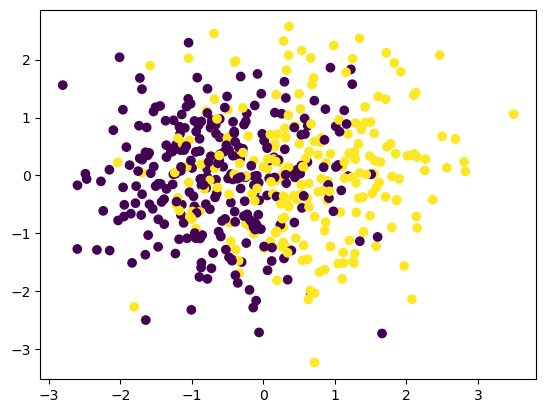

In [7]:
plt.scatter(X[0:500,0], X[0:500,1], marker='o', c=y[0:500])

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('The accuracy of Decision Tree is: ' ,accuracy_score(y_test, y_pred))

The accuracy of Decision Tree is:  0.902


# Bagging

In [11]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [12]:
bag.fit(X_train, y_train)

C:\Users\as233\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [13]:
y_pred1 = bag.predict(X_test)

In [14]:
print('The accuracy of Bagging is: ' ,accuracy_score(y_test, y_pred1))

The accuracy of Bagging is:  0.931


In [16]:
bag.estimators_samples_[0].shape

(2000,)

# Pasting

In [17]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42, 
    verbose=1,
    n_jobs=-1
)

In [18]:
bag.fit(X_train, y_train)
y_pred1 = bag.predict(X_test)
print('The accuracy of Bagging is: ' ,accuracy_score(y_test, y_pred1))

C:\Users\as233\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    8.8s remaining:   26.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    8.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s


The accuracy of Bagging is:  0.931


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


# Random Subspaces

In [19]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    random_state=42, 
    verbose=1,
    n_jobs=-1
)

In [20]:
bag.fit(X_train, y_train)
y_pred1 = bag.predict(X_test)
print('The accuracy of Bagging is: ' ,accuracy_score(y_test, y_pred1))

C:\Users\as233\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   16.3s remaining:   49.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.3s


The accuracy of Bagging is:  0.923


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished


In [21]:
bag.estimators_samples_[0].shape

(8000,)

In [23]:
bag.estimators_features_[0].shape

(5,)

# Random Patches

In [24]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    bootstrap_features=True,
    max_features=0.5,
    random_state=42, 
    verbose=1,
    n_jobs=-1
)

In [25]:
bag.fit(X_train, y_train)
y_pred1 = bag.predict(X_test)
print('The accuracy of Bagging is: ' ,accuracy_score(y_test, y_pred1))

C:\Users\as233\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.0s remaining:    9.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


The accuracy of Bagging is:  0.903


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


In [26]:
bag.estimators_samples_[0].shape

(2000,)

In [27]:
bag.estimators_features_[0].shape

(5,)

# OOB Score (out of bag sample)

In [28]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42, 
    verbose=1,
    n_jobs=-1
)

In [29]:
bag.fit(X_train, y_train)

C:\Users\as233\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.1s remaining:   15.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    5.2s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=42,
                  verbose=1)

In [30]:
bag.oob_score_

0.933875

In [31]:
y_pred1 = bag.predict(X_test)
print('The accuracy of Bagging is: ' ,accuracy_score(y_test, y_pred1))

The accuracy of Bagging is:  0.931


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
